In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_theme(style="white", palette=None,rc={'figure.figsize':(9.7,6.27)})
import warnings
warnings.filterwarnings('ignore')

# **Import Data**

In [3]:
Netflix_Data=pd.read_csv("/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv")
Netflix_Data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
Netflix_Data.tail()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV
8789,s8786,TV Show,YOM,Not Given,Pakistan,6/7/2018,2016,TV-Y7,1 Season,Kids' TV


In [5]:
Netflix_Data.sample(3)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
4172,s5850,Movie,Team Foxcatcher,Jon Greenhalgh,United States,4/29/2016,2016,TV-MA,91 min,"Documentaries, Sports Movies"
3985,s5560,Movie,Felipe Neto: My Life Makes No Sense,Diego Pignataro,Brazil,3/24/2017,2017,TV-MA,91 min,Stand-Up Comedy
5827,s7946,Movie,Saturday Church,Damon Cardasis,United States,10/6/2020,2017,TV-MA,83 min,"Dramas, LGBTQ Movies"


In [6]:
Netflix_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
Netflix_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8790.0,2014.183163,8.825466,1925.0,2013.0,2017.0,2019.0,2021.0


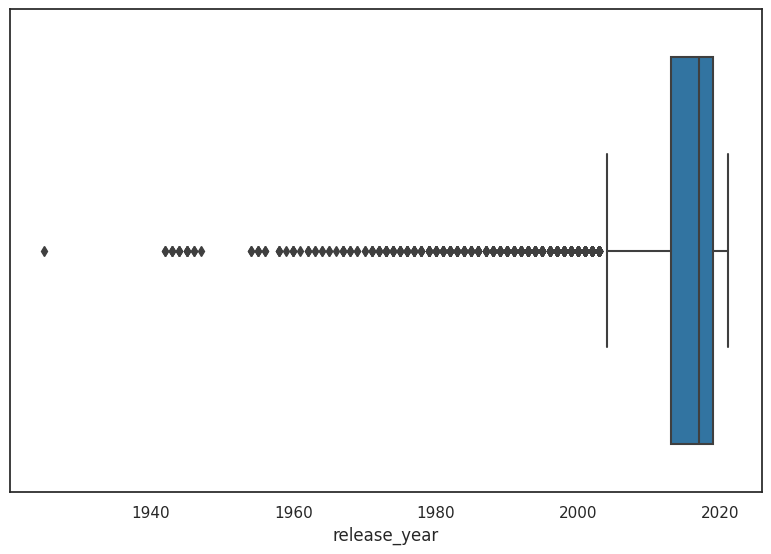

In [8]:
sns.boxplot(x=Netflix_Data['release_year'])
plt.show()

In [9]:
Netflix_Data.describe(include="object")

,show_id,type,title,director,country,date_added,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790,8790,8790
unique,8790,2,8787,4528,86,1713,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,3205,1791,362


In [10]:
Netflix_Data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [11]:
Netflix_Data.columns.to_list()

['show_id',
 'type',
 'title',
 'director',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in']

In [12]:
type_data=Netflix_Data.type.value_counts()
type_data

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

# **compera between Movie and TV Show**

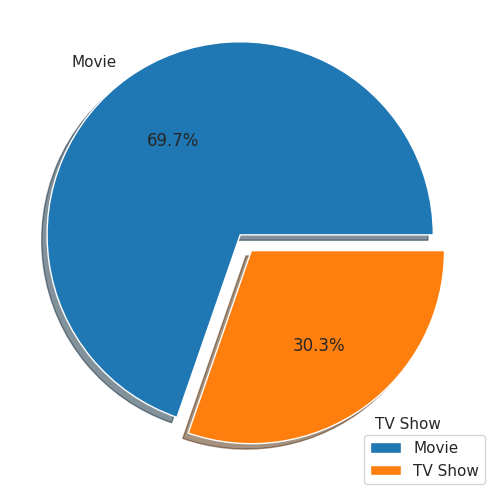

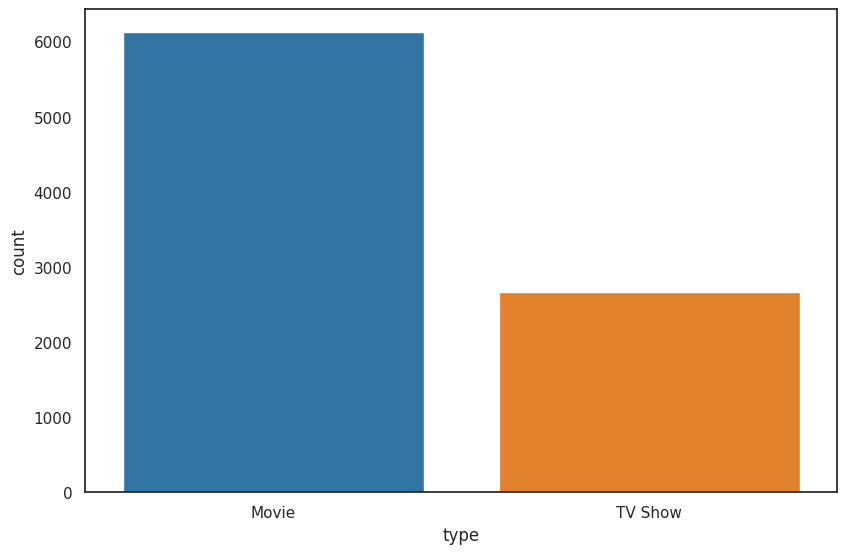

In [13]:
plt.pie(type_data.values,labels=type_data.index,autopct='%1.1f%%',shadow=True,explode=[.1,0])
plt.legend(loc="lower right")
plt.show()
sns.countplot(data=Netflix_Data,x="type")
plt.show()

# **compera between Movie and TV Show about year**

In [14]:
year_data=Netflix_Data["release_year"].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)
year_data["type"]=Netflix_Data["type"]
year_data

,release_year,count,type
0,2018,1146,Movie
1,2017,1030,TV Show
2,2019,1030,TV Show
3,2020,953,Movie
4,2016,901,Movie
5,2021,592,TV Show
6,2015,555,Movie
7,2014,352,Movie
8,2013,286,Movie
9,2012,236,Movie


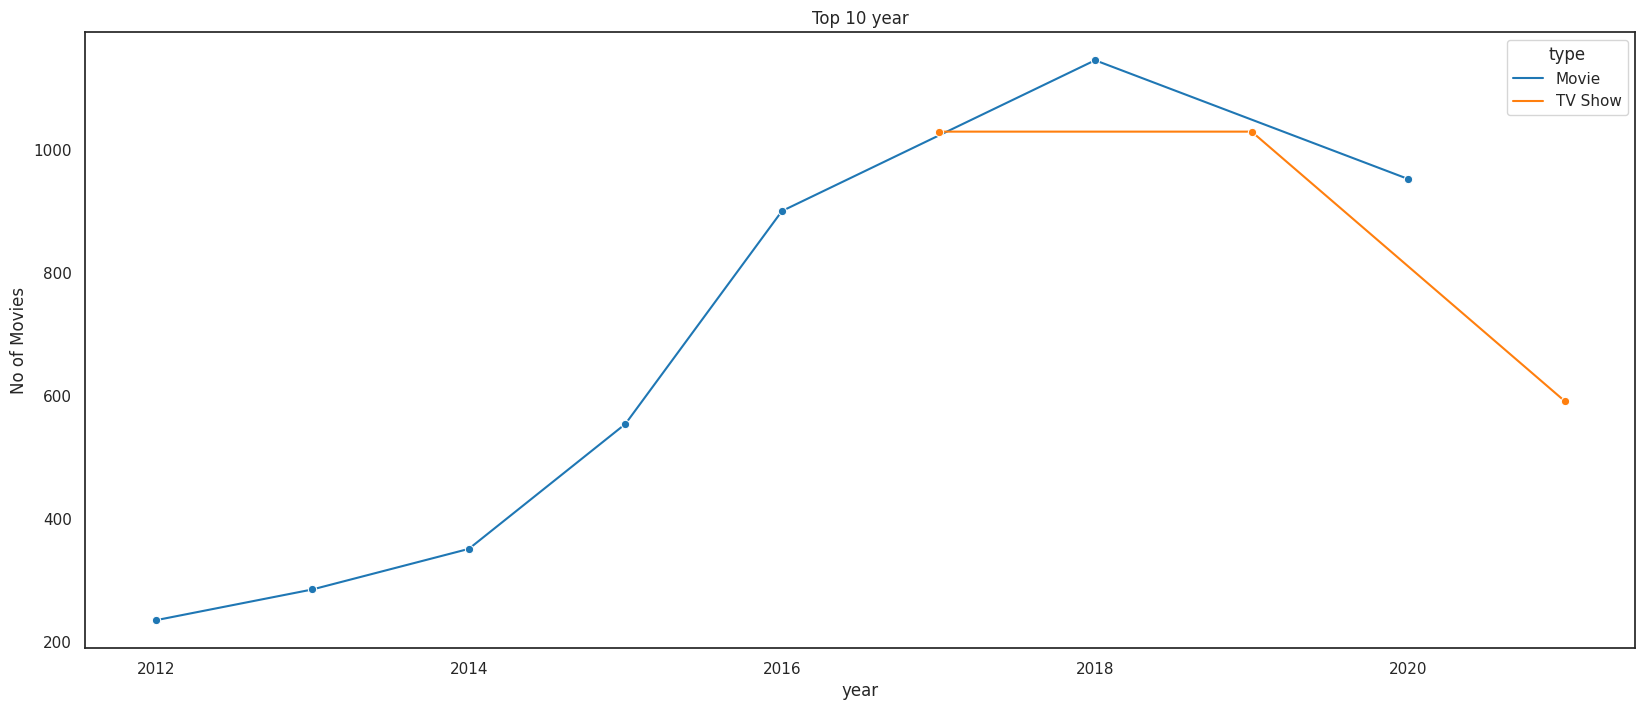

In [15]:
plt.figure(figsize=(20,8))
plt.title('Top 10 year')
sns.lineplot(x='release_year',y='count',data=year_data,hue="type",marker="o")
plt.xlabel('year')
plt.ylabel('No of Movies')
plt.show()

In [16]:
country_data=Netflix_Data["country"].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)
country_data["type"]=Netflix_Data["type"]
country_data

,country,count,type
0,United States,3240,Movie
1,India,1057,TV Show
2,United Kingdom,638,TV Show
3,Pakistan,421,Movie
4,Not Given,287,Movie
5,Canada,271,TV Show
6,Japan,259,Movie
7,South Korea,214,Movie
8,France,213,Movie
9,Spain,182,Movie


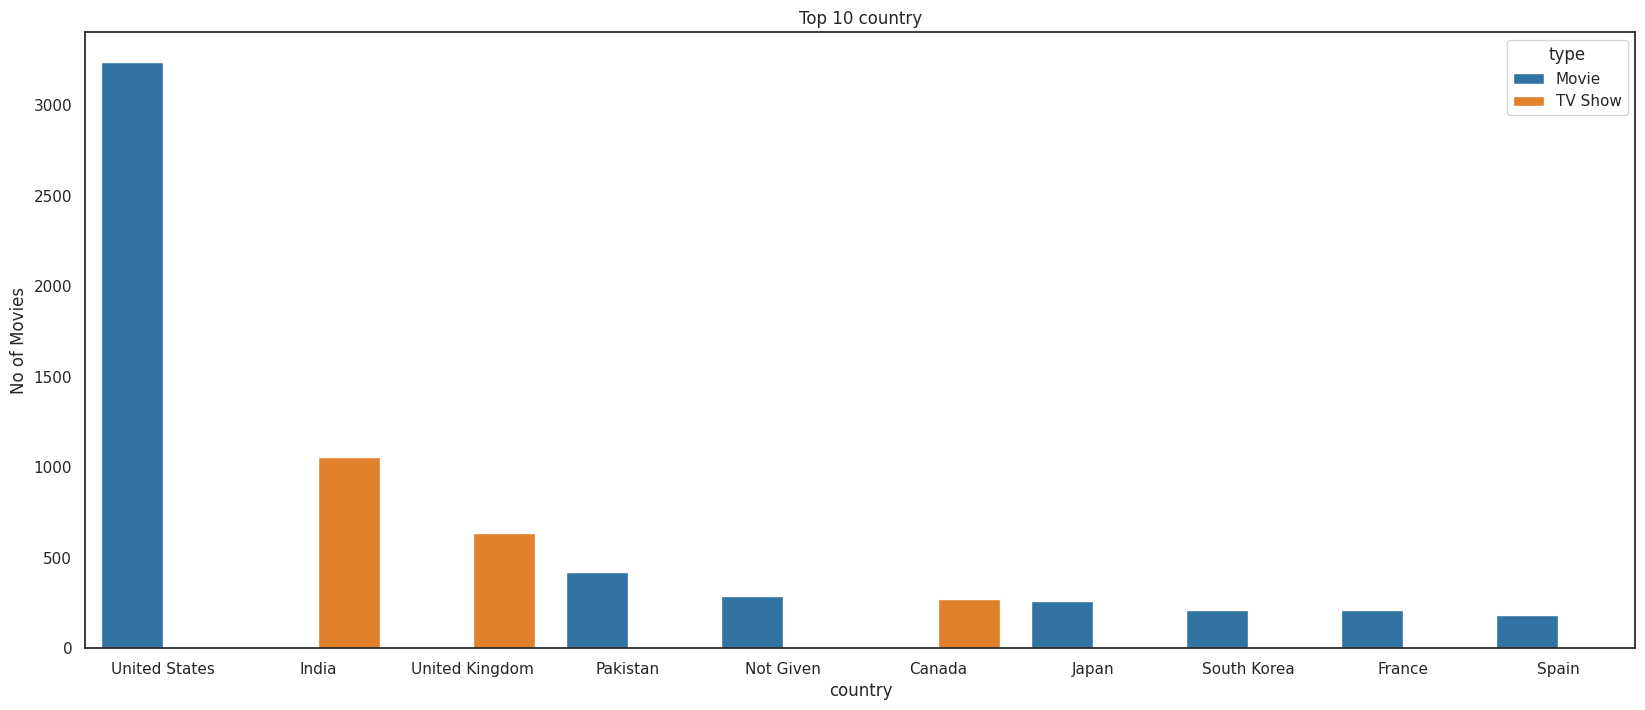

In [17]:
plt.figure(figsize=(20,8))
plt.title('Top 10 country')
sns.barplot(x='country',y='count',data=country_data,hue="type")
plt.xlabel('country')
plt.ylabel('No of Movies')
plt.show()

# **compera between Movie and TV Show about duration**

In [18]:
country_data["duration"]=Netflix_Data["duration"]
country_data=country_data.sort_values(by="duration")
country_data

,country,count,type,duration
1,India,1057,TV Show,1 Season
2,United Kingdom,638,TV Show,1 Season
6,Japan,259,Movie,104 min
4,Not Given,287,Movie,125 min
8,France,213,Movie,127 min
9,Spain,182,Movie,76 min
7,South Korea,214,Movie,87 min
5,Canada,271,TV Show,9 Seasons
0,United States,3240,Movie,90 min
3,Pakistan,421,Movie,91 min


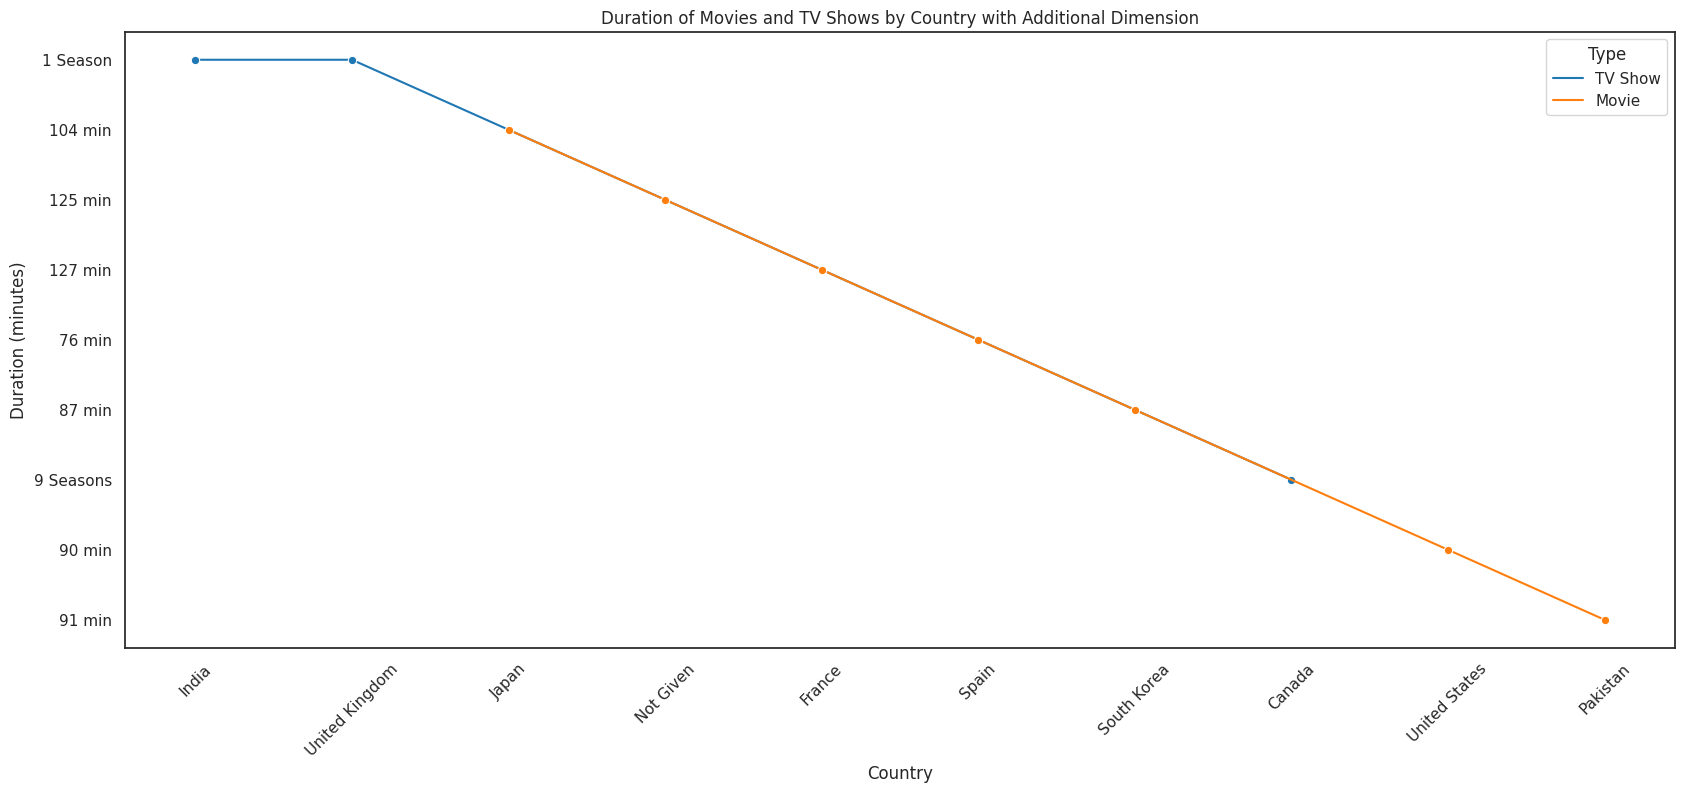

In [27]:
plt.figure(figsize=(20,8))
plt.title('Duration of Movies and TV Shows by Country with Additional Dimension')
sns.lineplot(x='country',y='duration',data=country_data,hue="type",marker="o")
plt.xlabel('Country')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)  
plt.legend(title='Type', loc='upper right')  
plt.show()


# **Max Rating**

In [46]:
Rating_data=Netflix_Data['rating'].value_counts()
Rating_data

rating
TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: count, dtype: int64

In [52]:
plt.figure(figsize=(20,8))
fig = px.pie(values=Rating_data.values, names=Rating_data.index)
fig.show()

<Figure size 2000x800 with 0 Axes>

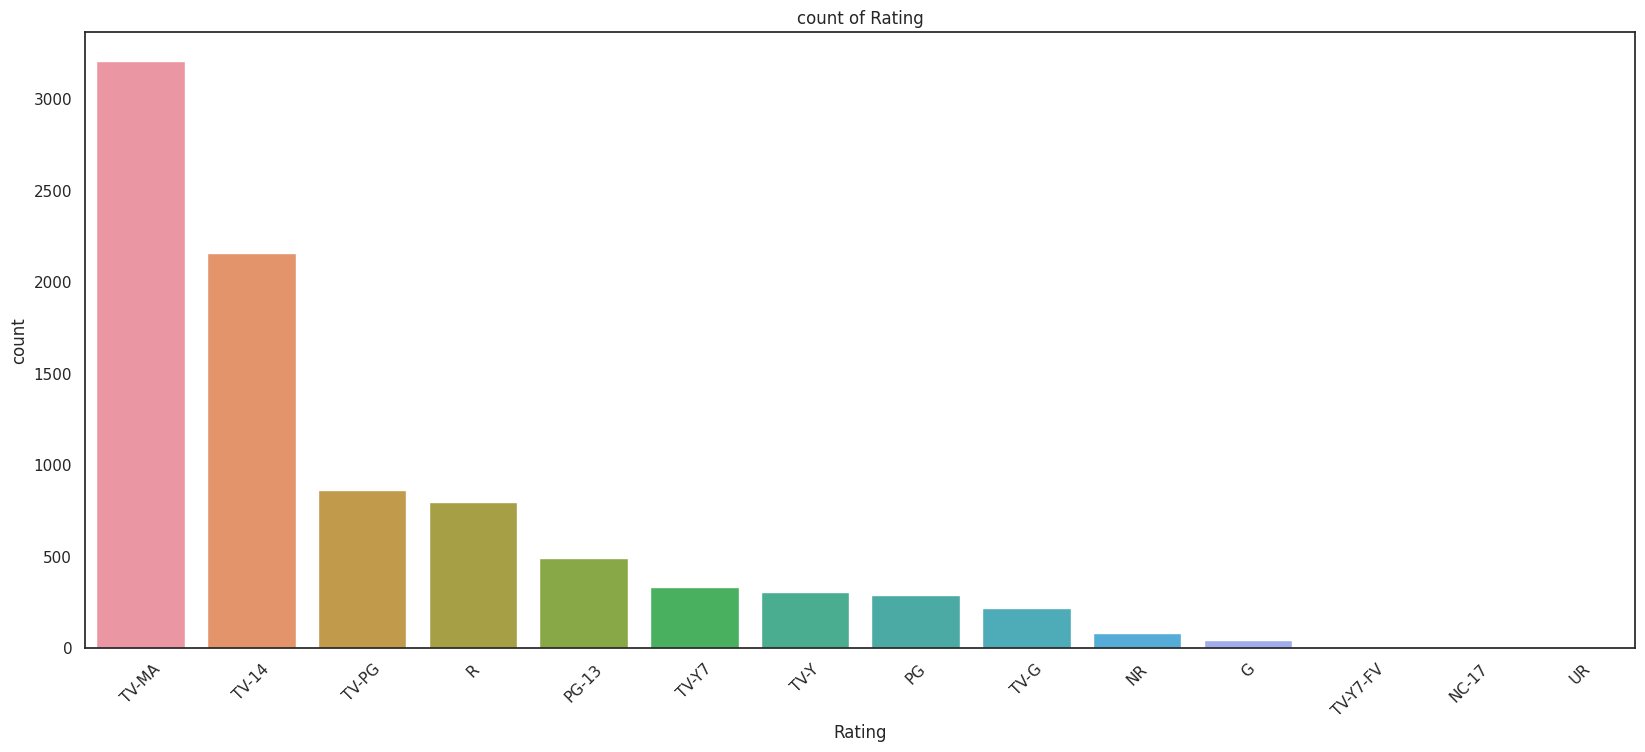

In [34]:
plt.figure(figsize=(20,8))
sns.barplot(x=Rating_data.index,y=Rating_data.values)
plt.title('count of Rating')
plt.ylabel('count')
plt.xlabel('Rating')
plt.xticks(rotation=45)  
plt.show()

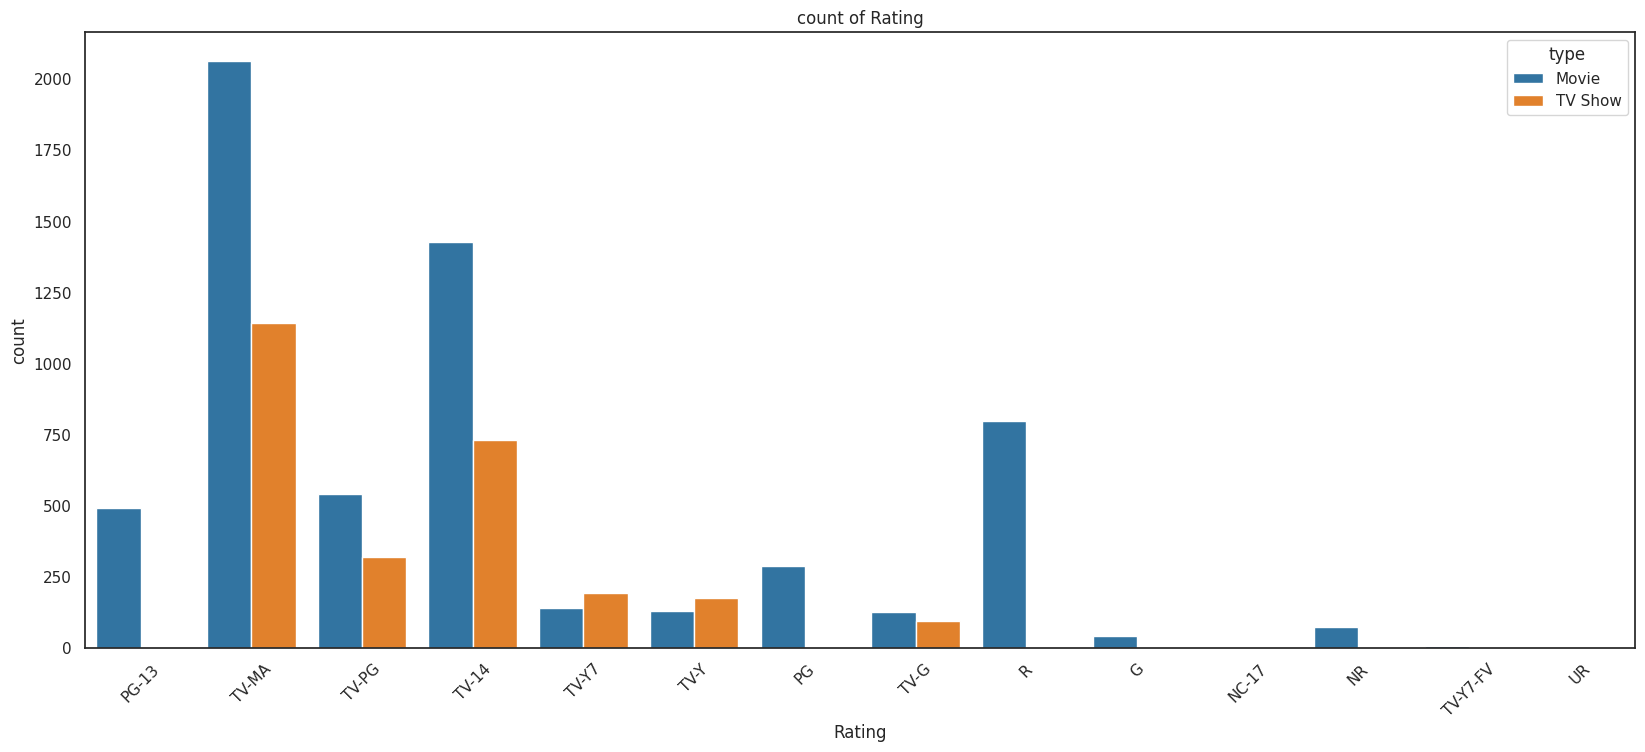

In [37]:
plt.figure(figsize=(20,8))
sns.countplot(x='rating',data=Netflix_Data,hue='type')
plt.title('count of Rating')
plt.ylabel('count')
plt.xlabel('Rating')
plt.xticks(rotation=45)  
plt.show()

# **compera between Movie and TV Show about year**

In [78]:
Rating_data=Netflix_Data['director'].value_counts().reset_index().sort_values(by="count",ascending=False).head(10)
Rating_data["type"]=Netflix_Data['type']
Rating_data["country"]=Netflix_Data['country']
Rating_data["release_year"]=Netflix_Data['release_year']
Rating_data

,director,count,type,country,release_year
0,Not Given,2588,Movie,United States,2020
1,Rajiv Chilaka,20,TV Show,France,2021
2,Alastair Fothergill,18,TV Show,United States,2021
3,"Raúl Campos, Jan Suter",18,Movie,Brazil,2021
4,Suhas Kadav,16,Movie,United States,1993
5,Marcus Raboy,16,TV Show,United Kingdom,2021
6,Jay Karas,14,Movie,United States,2021
7,Cathy Garcia-Molina,13,Movie,India,2019
9,Youssef Chahine,12,Movie,India,2013
10,Jay Chapman,12,Movie,India,2014


In [79]:
Rating_data.drop(0,inplace=True)

In [80]:
Rating_data

,director,count,type,country,release_year
1,Rajiv Chilaka,20,TV Show,France,2021
2,Alastair Fothergill,18,TV Show,United States,2021
3,"Raúl Campos, Jan Suter",18,Movie,Brazil,2021
4,Suhas Kadav,16,Movie,United States,1993
5,Marcus Raboy,16,TV Show,United Kingdom,2021
6,Jay Karas,14,Movie,United States,2021
7,Cathy Garcia-Molina,13,Movie,India,2019
9,Youssef Chahine,12,Movie,India,2013
10,Jay Chapman,12,Movie,India,2014


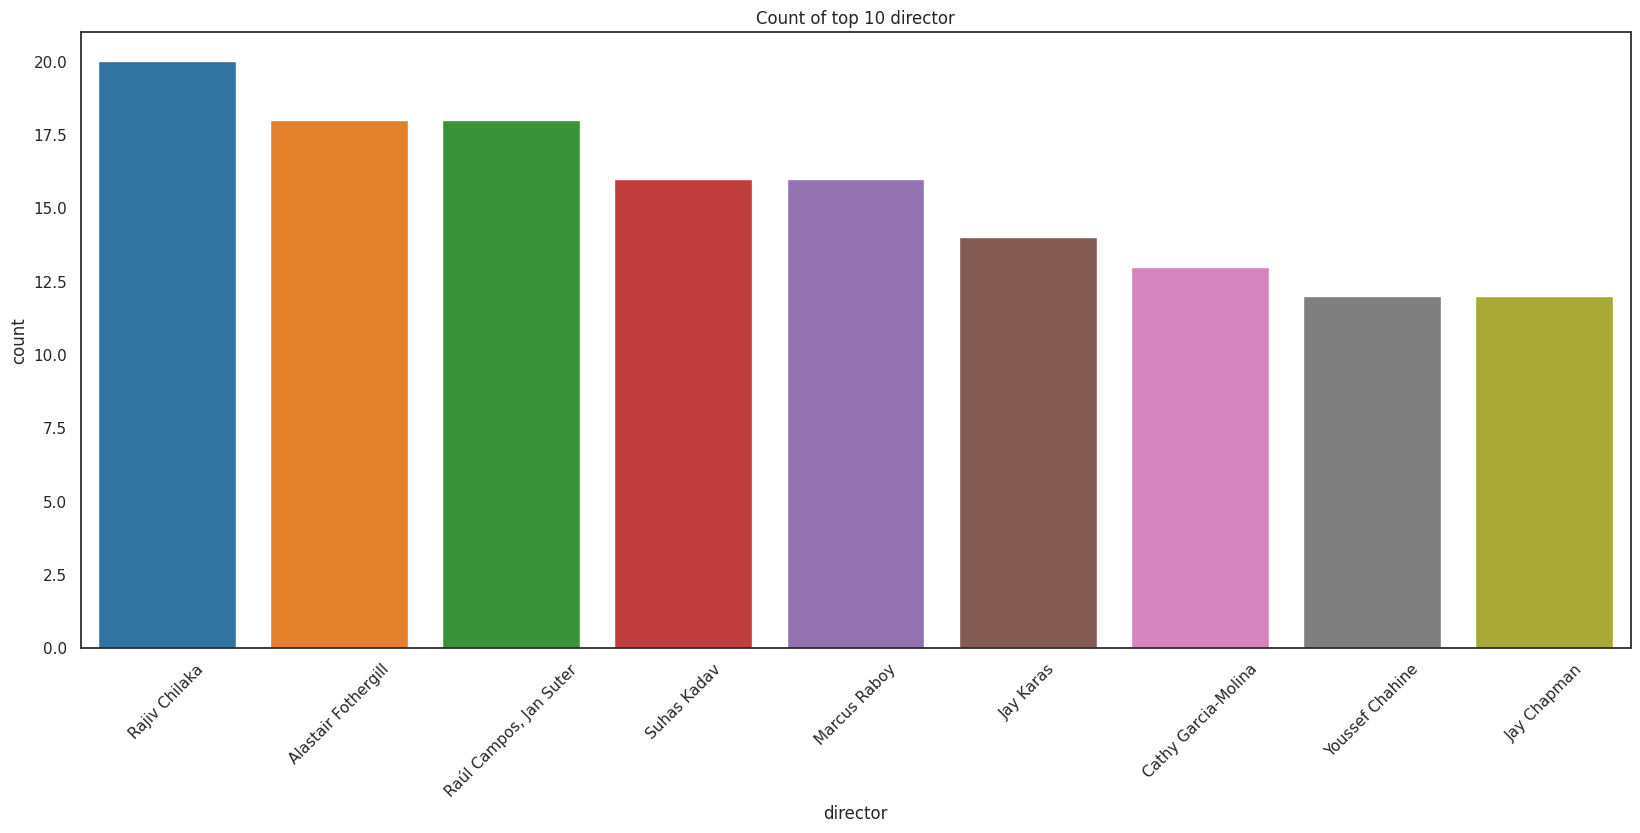

In [84]:
plt.figure(figsize=(20,8))
sns.barplot(data=Rating_data,x="director",y="count")
plt.title("Count of top 10 director")
plt.xticks(rotation=45)
plt.show()

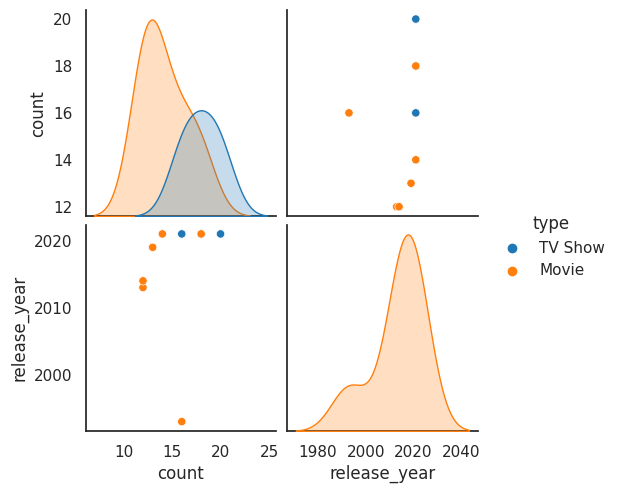

In [100]:
sns.pairplot(Rating_data, hue="type")